<a href="https://colab.research.google.com/github/mrityunjay-singh-99/Deeplearing/blob/master/wine_quality_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine_df=pd.read_csv("/content/winequality_red.csv")
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
cat_col=wine_df.select_dtypes(include="object").columns
cat_col

Index([], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
  wine_df[i]=le.fit_transform(wine_df[i])
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_df["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
X=wine_df.drop("quality",axis=1)
y=wine_df["quality"]
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in X.columns:
  X[i]=sc.fit_transform(X[[i]])
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1324)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

#model
model=Sequential()

#input layer
model.add(Dense(11,input_dim=X_train.shape[1],activation="relu"))

#hidden layers
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
#output layer
model.add(Dense(1,activation="linear"))

#model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,037 (47.02 KB)

 Trainable params: 12,037 (47.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compiling ANN
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])

history=model.fit(X_train,
                  y_train,
                  epochs=10,
                  #batch_size=150,
                  validation_data=(X_test,y_test),
                  verbose=True)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 27.1259 - mse: 27.1259 - val_loss: 5.8667 - val_mse: 5.8667
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.0590 - mse: 5.0590 - val_loss: 2.6902 - val_mse: 2.6902
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4312 - mse: 2.4312 - val_loss: 1.8296 - val_mse: 1.8296
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7765 - mse: 1.7765 - val_loss: 1.2854 - val_mse: 1.2854
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1754 - mse: 1.1754 - val_loss: 0.9419 - val_mse: 0.9419
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8043 - mse: 0.8043 - val_loss: 0.7501 - val_mse: 0.7501
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6993 - mse: 0.6993 - val_loss: 0.6480 - val_mse: 0.6480
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5138 - mse: 0.5138 - val_loss: 0.5992 - val_mse: 0.5992
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5011 - mse

In [ ]:
model.compile(
    optimizer='adam',
    loss='huber',
    metrics=['mse', 'mae']
)

history=model.fit(X_train,
                  y_train,
                  epochs=10,
                  #batch_size=150,
                  validation_data=(X_test,y_test),
                  verbose=True)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.2361 - mae: 0.5629 - mse: 0.5174 - val_loss: 0.2423 - val_mae: 0.5610 - val_mse: 0.5355
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2163 - mae: 0.5321 - mse: 0.4668 - val_loss: 0.2476 - val_mae: 0.5665 - val_mse: 0.5428
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2071 - mae: 0.5142 - mse: 0.4407 - val_loss: 0.2305 - val_mae: 0.5653 - val_mse: 0.5107
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1955 - mae: 0.5103 - mse: 0.4174 - val_loss: 0.2459 - val_mae: 0.5926 - val_mse: 0.5507
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2020 - mae: 0.5235 - mse: 0.4284 - val_loss: 0.2342 - val_mae: 0.5720 - val_mse: 0.5210
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1862 - mae: 0.4949 - mse: 0.3997 - val_loss: 0.2338 - val_mae: 0.5645 - val_mse: 0.5268
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1981 - mae: 0.5133 - mse: 0.4239 - val_loss: 0.2289

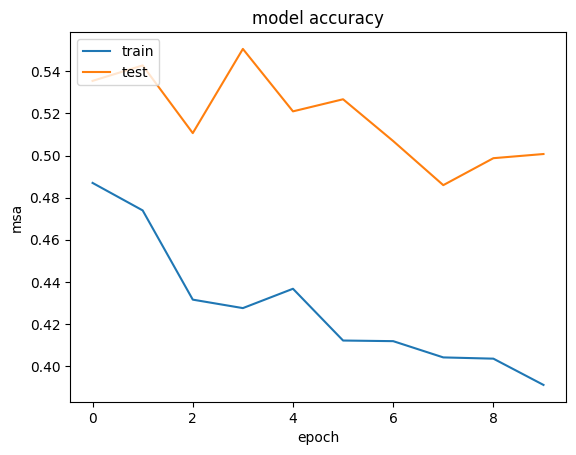

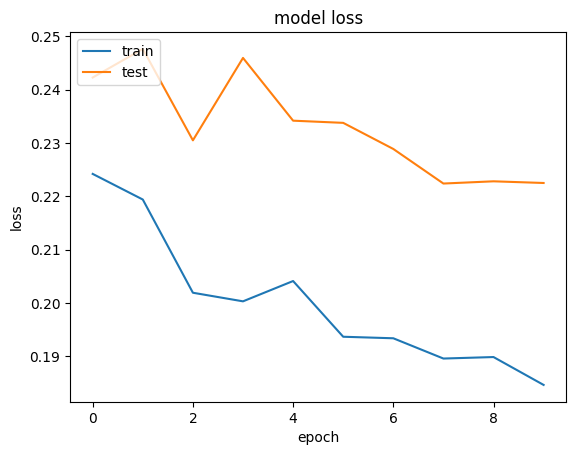

In [ ]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('msa')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,y_test,verbose=0)

[0.22249844670295715, 0.5007408261299133, 0.5568417310714722]

In [ ]:
test_loss,test_mae,test_mse=model.evaluate(X_test,y_test,verbose=0)
print("Test Loss: ",test_loss)
print("Test mae: ",test_mae)
print("Test mse: ",test_mse)
print("Test rmse: ", np.sqrt(test_mse))

Test Loss:  0.22249844670295715
Test mae:  0.5007408261299133
Test mse:  0.5568417310714722
Test rmse:  0.7462182864761974


In [ ]:
y_predict=model.predict(X_test)
#y_predict

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

r_squre=r2_score(y_test,y_predict)
print("R_squre: ",r_squre)
mae=mean_absolute_error(y_test,y_predict)
print("MAE: ",mae)
mse=mean_squared_error(y_test,y_predict)
print("MSE: ",mse)
rmse=np.sqrt(mse)
print("RMSE: ",rmse)

R_squre:  0.24398648738861084
MAE:  0.5568417817354202
MSE:  0.500740808043821
RMSE:  0.7076304176926124


In [ ]:
ground_truth_data=y_test.values
print(ground_truth_data)
predict_data=y_predict.astype(int)
#print(predict_data)

[5 5 5 6 5 4 7 6 5 5 7 5 6 6 6 5 5 6 6 6 7 6 7 6 5 5 6 6 4 5 5 7 6 6 5 5 6
 4 6 6 6 6 6 4 6 6 6 6 4 6 5 5 6 5 5 5 5 5 7 6 6 6 7 5 6 7 5 6 6 5 5 6 7 6
 4 8 6 5 6 7 6 6 6 7 6 5 6 5 5 6 7 3 6 6 6 6 6 6 5 6 6 5 5 6 3 7 6 7 6 5 7
 6 6 5 6 5 5 6 6 6 5 5 5 5 7 6 5 6 5 6 6 6 7 5 5 6 7 5 5 6 5 6 5 6 7 7 5 7
 6 5 6 7 6 6 5 7 7 6 5 5 6 5 6 6 5 7 6 5 3 6 5 5 5 5 5 5 5 5 6 7 5 6 7 5 6
 5 5 5 5 7 6 6 6 5 5 5 7 6 5 6 8 5 5 6 6 5 5 6 5 6 5 7 6 6 7 6 5 5 5 5 6 6
 4 4 5 6 5 7 7 6 5 5 5 5 7 5 5 6 5 5 6 5 5 5 6 5 6 4 5 5 5 5 6 6 7 6 4 7 5
 5 6 6 6 6 4 6 6 5 6 6 6 6 5 6 5 5 5 5 5 6 7 7 5 7 5 6 6 5 6 5 7 5 6 5 5 5
 5 5 5 7 6 5 5 6 6 7 6 5 5 6 6 5 5 6 5 5 7 6 6 5]


In [ ]:
df=pd.DataFrame()
df["ground_truth"]=ground_truth_data
df["predict_data"]=predict_data
df

,ground_truth,predict_data
0,5,5
1,5,5
2,5,5
3,6,5
4,5,5
...,...,...
315,5,5
316,7,6
317,6,5
318,6,6
